In [54]:
# Import packages
import os
import sys
import datetime
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
start_date = datetime.datetime(2010, 1, 1).date()
end_date = datetime.datetime.now().date()
start_date, end_date

(datetime.date(2010, 1, 1), datetime.date(2025, 2, 13))

In [56]:
end_date - start_date

datetime.timedelta(days=5522)

In [57]:
ticker = "TSLA"

In [58]:
mstf = yf.Ticker(ticker)

mstf

yfinance.Ticker object <TSLA>

In [59]:
mstf.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [60]:
historical_data = mstf.history(start=start_date, end=end_date, interval="1d").reset_index()

historical_data.shape

(3680, 8)

In [61]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [62]:
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3680.000000,3680.000000,3680.000000,3680.000000,3.680000e+03,3680.0,3680.000000
mean,83.922418,85.767597,81.948660,83.894976,9.652863e+07,0.0,0.002174
std,110.691512,113.171802,107.966060,110.595962,7.746858e+07,0.0,0.096109
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,12.229167,12.436167,11.973833,12.188667,4.918238e+07,0.0,0.000000
50%,18.169334,18.418334,17.845333,18.220667,8.195580e+07,0.0,0.000000
75%,181.850002,185.182495,177.187500,181.092499,1.217434e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


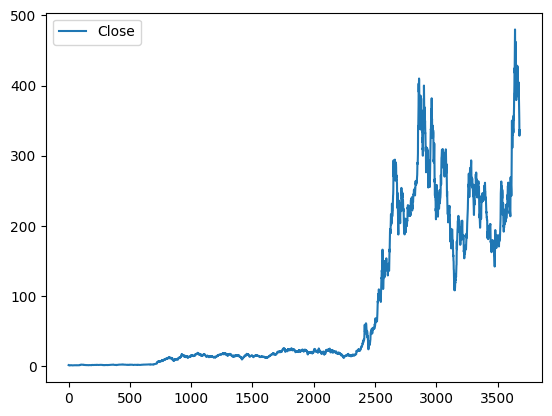

In [63]:
fig = plt.figure()

plt.plot(historical_data.Close)

plt.legend(["Close", "Open"])

In [64]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [65]:
# Create lag features
for i in range(1, 7):
    historical_data[f"Close_lag_{i}"] = historical_data.Close.shift(periods=i, axis=0)
    historical_data[f"Open_lag_{i}"] = historical_data.Open.shift(periods=i, axis=0)
    historical_data[f"High_lag_{i}"] = historical_data.High.shift(periods=i, axis=0)
    historical_data[f"Low_lag_{i}"] = historical_data.Low.shift(periods=i, axis=0)

historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,1.592667,1.266667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,1.588667,1.719333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.464000,1.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.280000,1.533333,...,1.666667,1.169333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
historical_data.fillna(0, inplace=True)
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,1.592667,1.266667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,1.588667,1.719333,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.464000,1.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.280000,1.533333,...,1.666667,1.169333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
historical_data.drop(
    columns=["Dividends", "Stock Splits", "Volume", "Open", "High", "Low"], inplace=True)

In [68]:
validation_period = 30 # 30 days

train, validation = historical_data.iloc[:-validation_period], historical_data.iloc[-validation_period:]

train.shape, validation.shape
((2649, 26), (30, 26))

((2649, 26), (30, 26))

In [69]:
train.head()

,Date,Close,Close_lag_1,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_2,Open_lag_2,High_lag_2,Low_lag_2,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2010-06-29 00:00:00-04:00,1.592667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.588667,1.592667,1.266667,1.666667,1.169333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.464000,1.588667,1.719333,2.028000,1.553333,1.592667,1.266667,1.666667,1.169333,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.280000,1.464000,1.666667,1.728000,1.351333,1.588667,1.719333,2.028000,1.553333,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.074000,1.280000,1.533333,1.540000,1.247333,1.464000,1.666667,1.728000,1.351333,...,1.666667,1.169333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
lag_features = [col for col in historical_data.columns if "lag" in col]

In [71]:
import prophet as prophet

In [72]:
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode="additive")
for name in lag_features:
    model.add_regressor(name)

model.fit(df=train.rename(columns={"Date": "ds", "Close":"y"}))

ValueError: Column ds has timezone specified, which is not supported. Remove timezone.